In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt

from qiskit import Aer
from tqdm.notebook import tqdm
from sklearn.datasets import load_iris

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Iris Data

## Data Preparation

In [16]:
iris = load_iris()

In [17]:
x = iris.data
y = iris.target

### Only first two classes

In [18]:
x = x[y != 1]
y = y[y != 1].reshape(-1,1)
print(x.shape, y.shape)

(100, 4) (100, 1)


### Normalize Input Data

In [19]:
x = x - np.amin(x, axis = 0)
x = x/np.max(x, axis = 0)
x = np.pi*x

## Train Model

In [30]:
backend = Aer.get_backend('qasm_simulator')

In [31]:
np.random.seed(42)
network1 = sequential_qnn(q_bits = [4, 2],
                         dim = [4, 2, 1],
                         reps = 1,
                         backend = backend,
                         shots = 10000,
                         lr = 0.1)

In [32]:
network1.train(x,y, epochs = 50, verbose = True)

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 0, loss: 1.5303660123
epoch: 1, loss: 1.27037884
epoch: 2, loss: 1.0486628703999998
epoch: 3, loss: 0.9408145831000002
epoch: 4, loss: 0.9220808502000001
epoch: 5, loss: 0.9140466321999999
epoch: 6, loss: 0.8828278777
epoch: 7, loss: 0.8365044170999998
epoch: 8, loss: 0.7820591594000001
epoch: 9, loss: 0.7316349496000001
epoch: 10, loss: 0.6954609309000002
epoch: 11, loss: 0.670552249
epoch: 12, loss: 0.6565341529
epoch: 13, loss: 0.6514492619
epoch: 14, loss: 0.6495542032999999
epoch: 15, loss: 0.6455872587999998
epoch: 16, loss: 0.6347996142
epoch: 17, loss: 0.627237851
epoch: 18, loss: 0.6197022324
epoch: 19, loss: 0.6168619063
epoch: 20, loss: 0.6143093495
epoch: 21, loss: 0.6140872153
epoch: 22, loss: 0.6106026707
epoch: 23, loss: 0.6051527942999999
epoch: 24, loss: 0.6022706779000001
epoch: 25, loss: 0.5933880470999999
epoch: 26, loss: 0.5857507794000001
epoch: 27, loss: 0.5788155559
epoch: 28, loss: 0.5740959370000001
epoch: 29, loss: 0.5688045593000001
epoch: 30, loss: 0

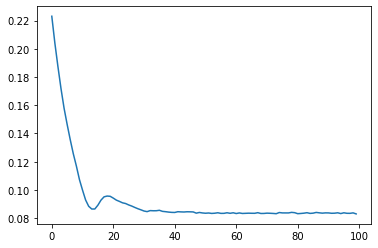

In [36]:
plt.plot(network1.loss)

In [8]:
#saver(network1, data_path("Iris_qnn1"))
network1 = loader(data_path("Iris_qnn1"))

In [33]:
np.random.seed(40)
network2 = sequential_dnn(dim=[4, 2, 1], bias=False, lr=0.1)

In [34]:
network2.train(x,y, epochs = 1000, verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 0, loss: 1.0115417591725153
epoch: 1, loss: 0.9722881646533805
epoch: 2, loss: 0.949233896144894
epoch: 3, loss: 0.9351375658801261
epoch: 4, loss: 0.9254391801573526
epoch: 5, loss: 0.9171940166050581
epoch: 6, loss: 0.9087819009400832
epoch: 7, loss: 0.8994102688127643
epoch: 8, loss: 0.8887187071480952
epoch: 9, loss: 0.8765765700586268
epoch: 10, loss: 0.8630002485539845
epoch: 11, loss: 0.8481259378617362
epoch: 12, loss: 0.8322037010094797
epoch: 13, loss: 0.8155951475123762
epoch: 14, loss: 0.7987630516729232
epoch: 15, loss: 0.7822426450047989
epoch: 16, loss: 0.7665868058775912
epoch: 17, loss: 0.7522863613161935
epoch: 18, loss: 0.739683181835168
epoch: 19, loss: 0.7289082131274247
epoch: 20, loss: 0.7198732463124767
epoch: 21, loss: 0.7123208053315525
epoch: 22, loss: 0.7059093410254372
epoch: 23, loss: 0.7003005986999014
epoch: 24, loss: 0.6952234271085644
epoch: 25, loss: 0.6905027119642219
epoch: 26, loss: 0.686055589502264
epoch: 27, loss: 0.6818662533185325
epoch

epoch: 551, loss: 0.5104548781266508
epoch: 552, loss: 0.5104528171356231
epoch: 553, loss: 0.5104507653875747
epoch: 554, loss: 0.510448722809532
epoch: 555, loss: 0.5104466893291658
epoch: 556, loss: 0.5104446648747831
epoch: 557, loss: 0.5104426493753207
epoch: 558, loss: 0.5104406427603361
epoch: 559, loss: 0.5104386449600009
epoch: 560, loss: 0.5104366559050938
epoch: 561, loss: 0.5104346755269927
epoch: 562, loss: 0.5104327037576676
epoch: 563, loss: 0.5104307405296741
epoch: 564, loss: 0.5104287857761459
epoch: 565, loss: 0.5104268394307879
epoch: 566, loss: 0.5104249014278703
epoch: 567, loss: 0.510422971702221
epoch: 568, loss: 0.5104210501892186
epoch: 569, loss: 0.5104191368247875
epoch: 570, loss: 0.5104172315453901
epoch: 571, loss: 0.5104153342880209
epoch: 572, loss: 0.5104134449902002
epoch: 573, loss: 0.5104115635899681
epoch: 574, loss: 0.5104096900258779
epoch: 575, loss: 0.5104078242369909
epoch: 576, loss: 0.5104059661628692
epoch: 577, loss: 0.510404115743571
epoc

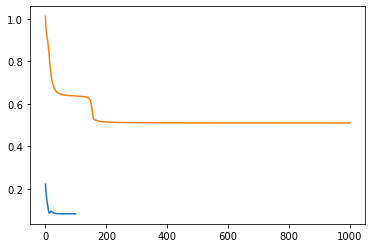

In [35]:
network1 = loader(data_path("Iris_qnn1"))
plt.plot(network1.loss)
plt.plot(network2.loss)
plt.show()

y_pred = np.round(network2.predict(x))

In [15]:
print(y_pred.flatten())
print(y.flatten())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
